In [10]:
# One time use - upgrade pip and install packages
import sys
# !{sys.executable} -m pip install --upgrade pip
# !{sys.executable} -m pip install findspark
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install seaborn

  Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages/bc/45/5118a05b0d61173e6eb12bc5804f0fbb6f196adb0a20e0b16efc2b8e98be/seaborn-0.11.0-py3-none-any.whl
    100% |████████████████████████████████| 11.6MB 117kB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/a2/21/e10d65222d19a2537e3eb0df306686a9eabd08b3c98dd120e43720bf802d/pandas-1.1.3-cp36-cp36m-manylinux1_x86_64.whl
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 25.9MB 50kB/s  eta 0:00:01    87% |████████████████████████████    | 22.7MB 42.1MB/s eta 0:00:01    98% |███████████████████████████████▍| 25.4MB 21.5MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/b8/e5/a64ef44a85397ba3c377f6be9c02f3cb3e18023f8c89850dd319e7945521/numpy-1.19.2-cp36-cp36m-manylinux1_x86_64.whl
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 92kB 10.0MB/s ta 0:00:01
  U

In [6]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

In [7]:
# 2.3
df = spark.read.option("header",True).option("inferSchema",True).csv('../dataset/cardio_train_preprocessed.csv')
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- ap_hi: integer (nullable = true)
 |-- ap_lo: integer (nullable = true)
 |-- cholesterol: integer (nullable = true)
 |-- gluc: integer (nullable = true)
 |-- smoke: integer (nullable = true)
 |-- alco: integer (nullable = true)
 |-- active: integer (nullable = true)
 |-- cardio: integer (nullable = true)



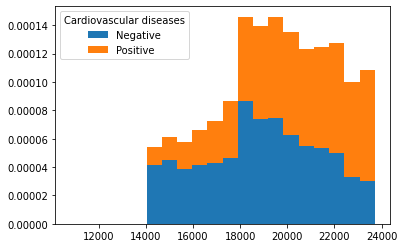

In [13]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

n_bins = 20
pds = df.toPandas()
df_cardio_0 = pds[pds["cardio"]==0]
df_cardio_1 = pds[pds["cardio"]==1]
df_cardio_label = ["Negative", "Positive"]
x = [df_cardio_0["age"], df_cardio_1["age"]]

plt.hist(x, n_bins, density=True, histtype='bar', stacked=True, label=df_cardio_label)
plt.legend(title='Cardiovascular diseases')
plt.show()

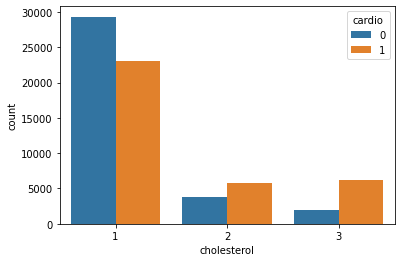

In [14]:
import seaborn as sns
ax = sns.countplot(x="cholesterol",hue="cardio",data=pds)
plt.show()

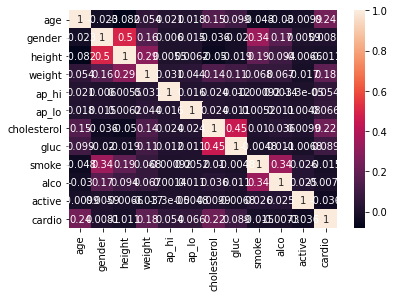

In [15]:
df = df.drop("id") # Drop id for not relevant
corr = df.toPandas().corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot=True)
plt.show()

In [16]:
# Reference: https://stackoverflow.com/a/44631639/10844976
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()

+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|     0|     0|     0|    0|    0|          0|   0|    0|   0|     0|     0|
+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+



In [23]:
# import pyspark.sql.functions as f
# df_mean = df.select(*[f.mean(c).alias(c) for c in df.columns])
# df_stddev = df.select(*[f.stddev(c).alias(c) for c in df.columns])
# df.select([count((c - f.mean(c)) / f.stddev(c)).alias(c) for c in df.columns]).show()

import numpy as np
from scipy import stats

pds = df.toPandas()
z_score = np.abs(stats.zscore(pds))
outliers = sum(z_score > 3)
pretty_outliers = list(zip(pds.columns, outliers))

[('age', 4),
 ('gender', 0),
 ('height', 293),
 ('weight', 702),
 ('ap_hi', 38),
 ('ap_lo', 951),
 ('cholesterol', 0),
 ('gluc', 5331),
 ('smoke', 6169),
 ('alco', 3764),
 ('active', 0),
 ('cardio', 0)]

<AxesSubplot:xlabel='age'>

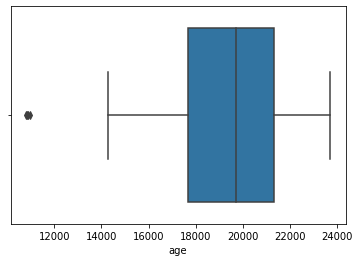

In [24]:
sns.boxplot(x=pds['age'])

In [30]:
df.select("age").orderBy(col("age").asc()).limit(20).show()
df.select("age").orderBy(col("age").desc()).limit(20).show()

+-----+
|  age|
+-----+
|10798|
|10859|
|10878|
|10964|
|14275|
|14277|
|14282|
|14284|
|14287|
|14291|
|14291|
|14291|
|14292|
|14293|
|14293|
|14294|
|14294|
|14295|
|14295|
|14296|
+-----+

+-----+
|  age|
+-----+
|23713|
|23701|
|23692|
|23690|
|23687|
|23684|
|23678|
|23677|
|23675|
|23675|
|23673|
|23673|
|23672|
|23670|
|23670|
|23670|
|23668|
|23668|
|23668|
|23667|
+-----+

